In [1]:
class ObjectDetector(object):

  def __init__(self):
    self.detection_graph = self._build_graph()
    self.sess = tf.Session(graph=self.detection_graph)

    label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    self.category_index = label_map_util.create_category_index(categories)

  def _build_graph(self):
    detection_graph = tf.Graph()
    with detection_graph.as_default():
      od_graph_def = tf.GraphDef()
      with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    return detection_graph

  def _load_image_into_numpy_array(self, image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

  def detect(self, image):
    image_np = self._load_image_into_numpy_array(image)
    image_np_expanded = np.expand_dims(image_np, axis=0)

    graph = self.detection_graph
    image_tensor = graph.get_tensor_by_name('image_tensor:0')
    boxes = graph.get_tensor_by_name('detection_boxes:0')
    scores = graph.get_tensor_by_name('detection_scores:0')
    classes = graph.get_tensor_by_name('detection_classes:0')
    num_detections = graph.get_tensor_by_name('num_detections:0')

    (boxes, scores, classes, num_detections) = self.sess.run(
        [boxes, scores, classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})

    boxes, scores, classes, num_detections = map(
        np.squeeze, [boxes, scores, classes, num_detections])

    return boxes, scores, classes.astype(int), num_detections


def draw_bounding_box_on_image(image, box, color='red', thickness=4):
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  ymin, xmin, ymax, xmax = box
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom),
             (right, top), (left, top)], width=thickness, fill=color)

from io import StringIO
def encode_image(image):
  image_buffer = StringIO()
  image.save(image_buffer, format='PNG')
  imgstr = 'data:image/png;base64,{:s}'.format(
      base64.b64encode(image_buffer.getvalue()))
  return imgstr


def detect_objects(image_path):
  image = Image.open(image_path).convert('RGB')
  boxes, scores, classes, num_detections = client.detect(image)
  image.thumbnail((480, 480), Image.ANTIALIAS)

  new_images = {}
  for i in range(num_detections):
    if scores[i] < 0.7: continue
    cls = classes[i]
    if cls not in new_images.keys():
      new_images[cls] = image.copy()
    draw_bounding_box_on_image(new_images[cls], boxes[i],
                               thickness=int(scores[i]*10)-4)

  result = {}
  result['original'] = encode_image(image.copy())

  for cls, new_image in new_images.iteritems():
    category = client.category_index[cls]['name']
    result[category] = encode_image(new_image)

  return result

In [2]:
import numpy as np
from PIL import Image
from PIL import ImageDraw
import tensorflow as tf
MODEL_BASE = '/opt/models/research'
PATH_TO_CKPT = '/opt/graph_def/frozen_inference_graph.pb'
PATH_TO_LABELS = MODEL_BASE + '/object_detection/data/mscoco_label_map.pbtxt'
client = ObjectDetector()

NotFoundError: /opt/graph_def/frozen_inference_graph.pb; No such file or directory

In [11]:
import base64
#import cStringIO
import sys
import tempfile

MODEL_BASE = '/Users/aadebuger/GEXT/github2019/models/research'
sys.path.append(MODEL_BASE)
sys.path.append(MODEL_BASE + '/object_detection')
sys.path.append(MODEL_BASE + '/slim')


import numpy as np
from PIL import Image
from PIL import ImageDraw
import tensorflow as tf
from utils import label_map_util




PATH_TO_CKPT = '/Users/aadebuger/GEXT/model/ssd_mobilenet_v1_coco_2018_01_28/frozen_inference_graph.pb'
PATH_TO_LABELS = MODEL_BASE + '/object_detection/data/mscoco_label_map.pbtxt'

content_types = {'jpg': 'image/jpeg',
                 'jpeg': 'image/jpeg',
                 'png': 'image/png'}
extensions = sorted(content_types.keys())


def is_image():
  def _is_image(form, field):
    if not field.data:
      raise ValidationError()
    elif field.data.filename.split('.')[-1].lower() not in extensions:
      raise ValidationError()

  return _is_image





class ObjectDetector(object):

  def __init__(self):
    self.detection_graph = self._build_graph()
    self.sess = tf.Session(graph=self.detection_graph)

    label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    self.category_index = label_map_util.create_category_index(categories)

  def _build_graph(self):
    detection_graph = tf.Graph()
    with detection_graph.as_default():
      od_graph_def = tf.GraphDef()
      with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    return detection_graph

  def _load_image_into_numpy_array(self, image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

  def detect(self, image):
    image_np = self._load_image_into_numpy_array(image)
    image_np_expanded = np.expand_dims(image_np, axis=0)

    graph = self.detection_graph
    image_tensor = graph.get_tensor_by_name('image_tensor:0')
    boxes = graph.get_tensor_by_name('detection_boxes:0')
    scores = graph.get_tensor_by_name('detection_scores:0')
    classes = graph.get_tensor_by_name('detection_classes:0')
    num_detections = graph.get_tensor_by_name('num_detections:0')

    (boxes, scores, classes, num_detections) = self.sess.run(
        [boxes, scores, classes, num_detections],
        feed_dict={image_tensor: image_np_expanded})

    boxes, scores, classes, num_detections = map(
        np.squeeze, [boxes, scores, classes, num_detections])

    return boxes, scores, classes.astype(int), num_detections


def draw_bounding_box_on_image(image, box, color='red', thickness=4):
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  ymin, xmin, ymax, xmax = box
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom),
             (right, top), (left, top)], width=thickness, fill=color)

from io import BytesIO
def encode_image(image):
  image_buffer = BytesIO()
  image.save(image_buffer, format='PNG')
  imagevalue = image_buffer.getvalue()
  base64str=base64.b64encode(imagevalue).decode()

  imgstr = 'data:image/png;base64,{:s}'.format(
     base64str )
  return imgstr


def detect_objects(image_path):
  image = Image.open(image_path).convert('RGB')
  boxes, scores, classes, num_detections = client.detect(image)
  image.thumbnail((480, 480), Image.ANTIALIAS)
  print(num_detections)
  new_images = {}
  for i in range(int(num_detections)):
    print("scres[i",scores[i])
    if scores[i] < 0.35: continue
    cls = classes[i]
    if cls not in new_images.keys():
      new_images[cls] = image.copy()
    draw_bounding_box_on_image(new_images[cls], boxes[i],
                               thickness=int(scores[i]*10)-4)

  result = {}
#  result['original'] = encode_image(image.copy())
  print(new_images)
  count = 0 
  for cls, new_image in new_images.items():
    category = client.category_index[cls]['name']
    print(category)
    result[category] = encode_image(new_image)
    new_image.save("{0}.jpg".format(count))
    count=count+1

  return result



PATH_TO_CKPT='/Users/aadebuger/GEXT/model/ssd_mobilenet_v1_0.75_depth_300x300_coco14_sync_2018_07_03/frozen_inference_graph.pb'

client = ObjectDetector()

In [8]:
detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')

0.0


TypeError: only integer scalar arrays can be converted to a scalar index

2.0
{18: <PIL.Image.Image image mode=RGB size=480x298 at 0x139F77BE0>}


{'original': '',
 'dog': ''}
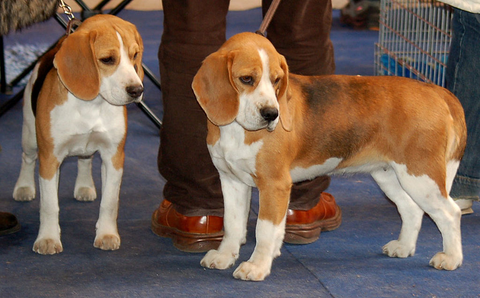
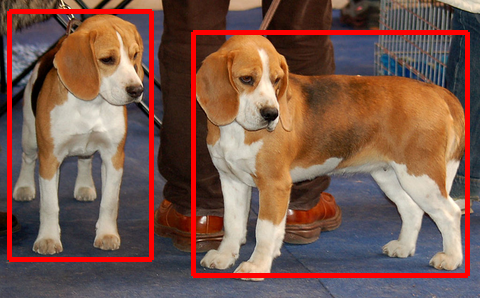

In [29]:
detect_objects('/Users/aadebuger/GEXT/github2019/models/research/object_detection/test_images/image1.jpg')

10.0
{18: <PIL.Image.Image image mode=RGB size=480x298 at 0x12EC02748>}


{'original': '',
 'dog': ''}
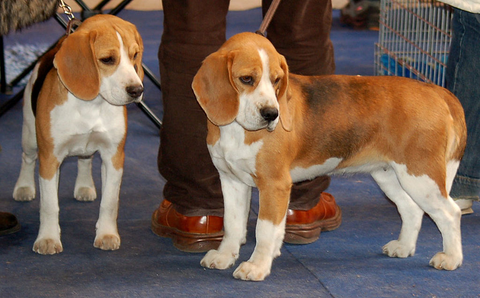
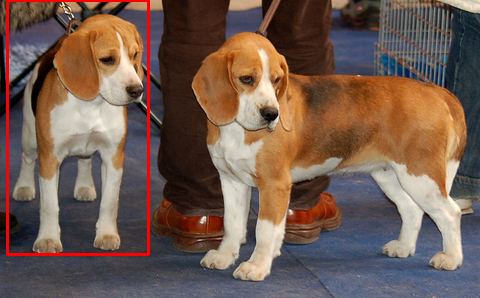

In [33]:
detect_objects('/Users/aadebuger/GEXT/github2019/models/research/object_detection/test_images/image1.jpg')

1.0
scres[i 0.4265248
{84: <PIL.Image.Image image mode=RGB size=480x360 at 0x134F0C240>}


{'original': '',
 'book': ''}
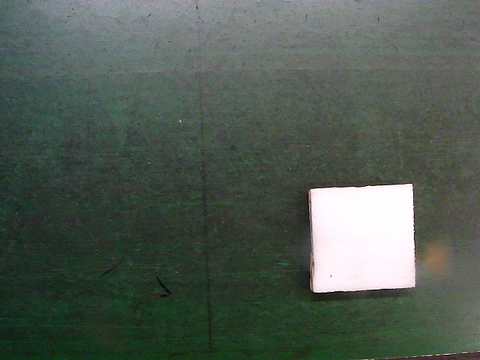
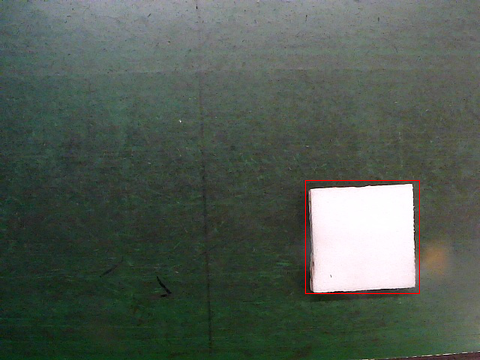

In [38]:
detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')

2.0
scres[i 0.4001464
scres[i 0.35878018
{84: <PIL.Image.Image image mode=RGB size=480x360 at 0x134F0C860>}


{'original': '',
 'book': ''}
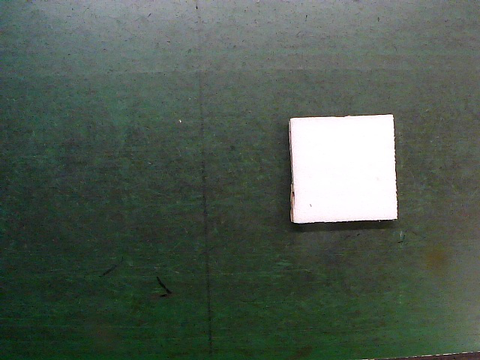
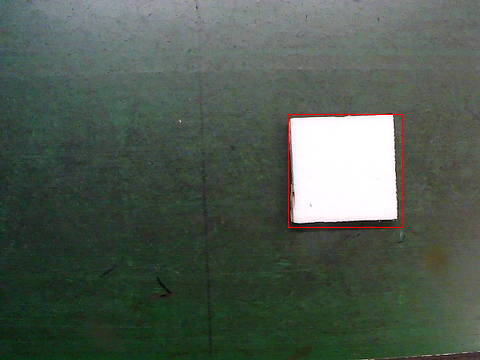

In [39]:
detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121229.jpg')

1.0
scres[i 0.44724253
{84: <PIL.Image.Image image mode=RGB size=480x360 at 0x134F0CE10>}


{'original': '',
 'book': ''}
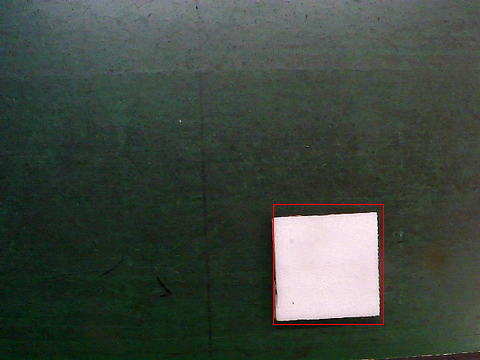

In [40]:
detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121146.jpg')

In [41]:
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/ssd_mobilenet_v1_quantized_300x300_coco14_sync_2018_07_18/frozen_inference_graph.pb'

client = ObjectDetector()

NotFoundError: /Users/aadebuger/GEXT/model/ssd_mobilenet_v1_quantized_300x300_coco14_sync_2018_07_18/frozen_inference_graph.pb; No such file or directory

In [42]:
from matplotlib import pyplot as plt

In [46]:
modelname='ssd_mobilenet_v1_ppn_shared_box_predictor_300x300_coco14_sync_2018_07_03'
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/'+modelname+'/frozen_inference_graph.pb'

client = ObjectDetector()

In [47]:
detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121146.jpg')

1.0
scres[i 0.38471726
{84: <PIL.Image.Image image mode=RGB size=480x360 at 0x12E970550>}


{'original': '',
 'book': ''}

2.0
scres[i 0.39932156
scres[i 0.31286654
{79: <PIL.Image.Image image mode=RGB size=480x360 at 0x12E970470>}


{'original': '',
 'oven': ''}
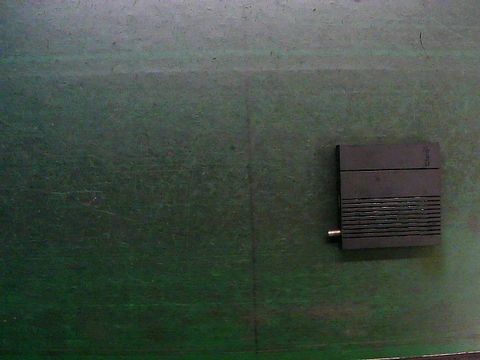
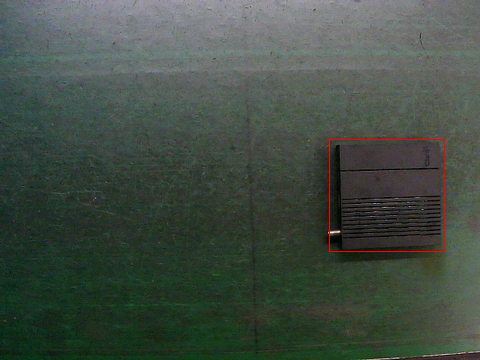

In [48]:
detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190429173234.jpg')

3.0
scres[i 0.54372
scres[i 0.3657862
scres[i 0.3396756
{79: <PIL.Image.Image image mode=RGB size=480x360 at 0x12E970668>, 15: <PIL.Image.Image image mode=RGB size=480x360 at 0x12E970630>}


{'original': '',
 'oven': '',
 'bench': ''}
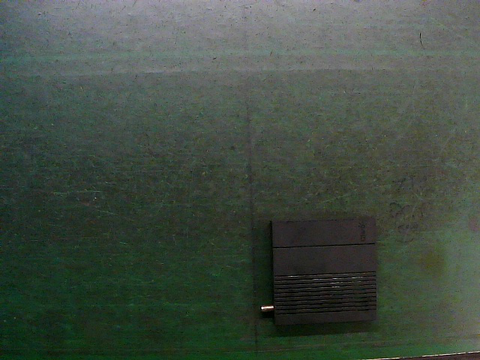
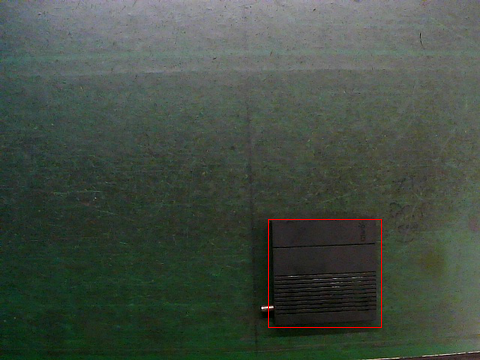
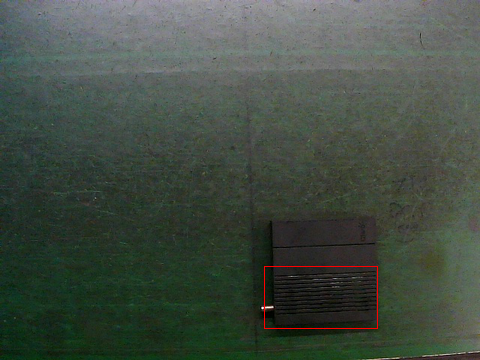

In [49]:
detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190429172938.jpg')

0.0
{}


{'original': ''}
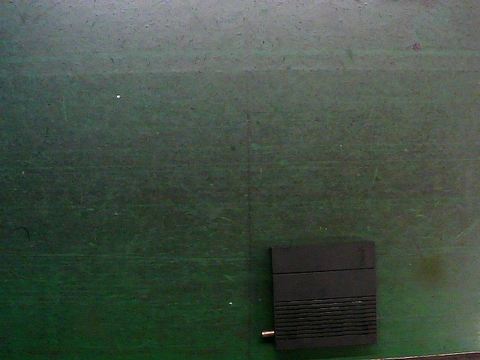

In [50]:
detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190428122854.jpg')

2.0
scres[i 0.46064657
scres[i 0.4464155
{84: <PIL.Image.Image image mode=RGB size=480x360 at 0x13BAE27F0>, 73: <PIL.Image.Image image mode=RGB size=480x360 at 0x13BAE2CF8>}
book
laptop
3



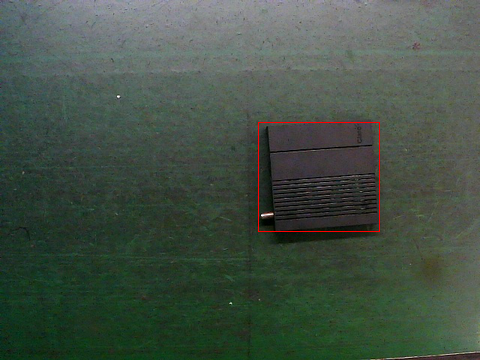
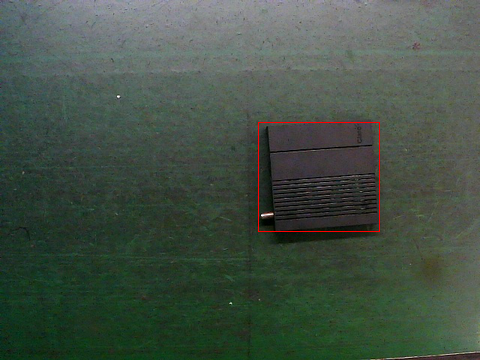

In [59]:
from IPython.display import HTML
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190428122750.jpg')
print(len(result))
HTML("<img src='{0}'/><img src='{1}'/>".format(result['book'],result['laptop']))


1.0
scres[i 0.45675844
{84: <PIL.Image.Image image mode=RGB size=480x360 at 0x13BAE2898>}
book
2



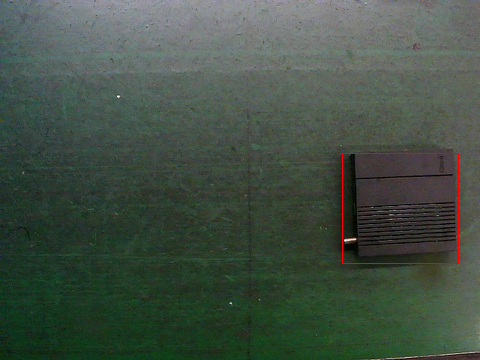

In [62]:
from IPython.display import HTML
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190428123048.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['book']))

In [4]:
modelname='ssd_inception_v2_coco_2018_01_28'
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/'+modelname+'/frozen_inference_graph.pb'

client = ObjectDetector()

In [5]:
from IPython.display import HTML
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190428123048.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['book']))

0.0
{}
1


KeyError: 'book'

1.0
scres[i 0.4265248
{84: <PIL.Image.Image image mode=RGB size=480x360 at 0x1463A0BE0>}
book
1



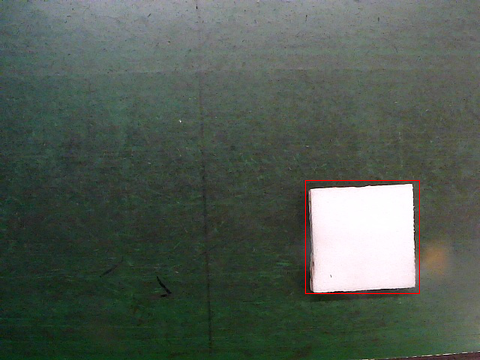

In [13]:
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['book']))

In [14]:
modelname='ssdlite_mobilenet_v2_coco_2018_05_09'
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/'+modelname+'/frozen_inference_graph.pb'

client = ObjectDetector()

In [15]:
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['book']))

0.0
{}
0


KeyError: 'book'

In [16]:
from IPython.display import HTML
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190428123048.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['book']))

0.0
{}
0


KeyError: 'book'

In [17]:
modelname='ssdlite_mobilenet_v2_coco_2018_05_09'
modelname='ssd_mobilenet_v2_coco_2018_03_29'
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/'+modelname+'/frozen_inference_graph.pb'

client = ObjectDetector()

In [18]:
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['book']))

0.0
{}
0


KeyError: 'book'

In [19]:
modelname='ssdlite_mobilenet_v2_coco_2018_05_09'
modelname='ssd_mobilenet_v2_coco_2018_03_29'
modelname='ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/'+modelname+'/frozen_inference_graph.pb'

client = ObjectDetector()

1.0
scres[i 0.42052498
{16: <PIL.Image.Image image mode=RGB size=480x360 at 0x12E73E748>}
bird
1



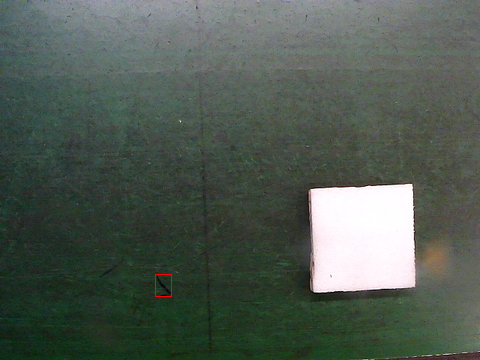

In [21]:
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['bird']))

In [22]:
#stb
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190428123048.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['bird']))

0.0
{}
0


KeyError: 'bird'

In [23]:
modelname='ssdlite_mobilenet_v2_coco_2018_05_09'
modelname='ssd_mobilenet_v2_coco_2018_03_29'
modelname='ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/'+modelname+'/frozen_inference_graph.pb'

client = ObjectDetector()

In [24]:
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['bird']))

0.0
{}
0


KeyError: 'bird'

In [25]:
modelname='ssdlite_mobilenet_v2_coco_2018_05_09'
modelname='ssd_mobilenet_v2_coco_2018_03_29'
modelname='ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='faster_rcnn_inception_v2_coco_2018_01_28'
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/'+modelname+'/frozen_inference_graph.pb'

client = ObjectDetector()

1.0
scres[i 0.72576374
{16: <PIL.Image.Image image mode=RGB size=480x360 at 0x13791E6A0>}
bird
1



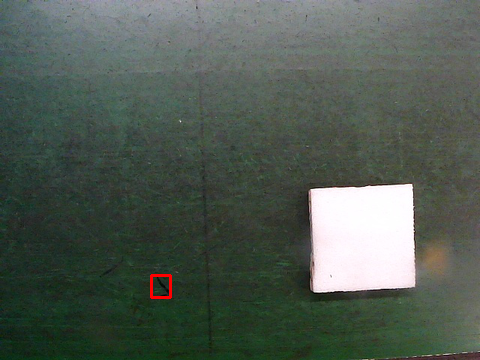

In [26]:
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['bird']))

In [27]:
modelname='ssdlite_mobilenet_v2_coco_2018_05_09'
modelname='ssd_mobilenet_v2_coco_2018_03_29'
modelname='ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='faster_rcnn_inception_v2_coco_2018_01_28'
modelname='faster_rcnn_resnet50_coco_2018_01_28'
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/'+modelname+'/frozen_inference_graph.pb'

client = ObjectDetector()

In [28]:
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['bird']))

0.0
{}
0


KeyError: 'bird'

In [29]:
modelname='ssdlite_mobilenet_v2_coco_2018_05_09'
modelname='ssd_mobilenet_v2_coco_2018_03_29'
modelname='ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='faster_rcnn_inception_v2_coco_2018_01_28'
modelname='faster_rcnn_resnet50_coco_2018_01_28'
modelname='faster_rcnn_resnet50_lowproposals_coco_2018_01_28'
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/'+modelname+'/frozen_inference_graph.pb'

client = ObjectDetector()

In [30]:
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['bird']))

0.0
{}
0


KeyError: 'bird'

In [31]:
modelname='ssdlite_mobilenet_v2_coco_2018_05_09'
modelname='ssd_mobilenet_v2_coco_2018_03_29'
modelname='ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='faster_rcnn_inception_v2_coco_2018_01_28'
modelname='faster_rcnn_resnet50_coco_2018_01_28'
modelname='faster_rcnn_resnet50_lowproposals_coco_2018_01_28'
modelname='rfcn_resnet101_coco_2018_01_28'
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/'+modelname+'/frozen_inference_graph.pb'

client = ObjectDetector()

In [32]:
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['bird']))

0.0
{}
0


KeyError: 'bird'

In [33]:
modelname='ssdlite_mobilenet_v2_coco_2018_05_09'
modelname='ssd_mobilenet_v2_coco_2018_03_29'
modelname='ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='faster_rcnn_inception_v2_coco_2018_01_28'
modelname='faster_rcnn_resnet50_coco_2018_01_28'
modelname='faster_rcnn_resnet50_lowproposals_coco_2018_01_28'
modelname='rfcn_resnet101_coco_2018_01_28'
modelname='faster_rcnn_resnet101_coco_2018_01_28'
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/'+modelname+'/frozen_inference_graph.pb'

client = ObjectDetector()

In [34]:
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['bird']))

0.0
{}
0


KeyError: 'bird'

In [40]:
modelname='ssdlite_mobilenet_v2_coco_2018_05_09'
modelname='ssd_mobilenet_v2_coco_2018_03_29'
modelname='ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='faster_rcnn_inception_v2_coco_2018_01_28'
modelname='faster_rcnn_resnet50_coco_2018_01_28'
modelname='faster_rcnn_resnet50_lowproposals_coco_2018_01_28'
modelname='rfcn_resnet101_coco_2018_01_28'
modelname='faster_rcnn_resnet101_coco_2018_01_28'
modelname='faster_rcnn_resnet101_lowproposals_coco_2018_01_28'
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/'+modelname+'/frozen_inference_graph.pb'
client = ObjectDetector()

In [41]:
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['bird']))

0.0
{}
0


KeyError: 'bird'

In [42]:
modelname='ssdlite_mobilenet_v2_coco_2018_05_09'
modelname='ssd_mobilenet_v2_coco_2018_03_29'
modelname='ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='faster_rcnn_inception_v2_coco_2018_01_28'
modelname='faster_rcnn_resnet50_coco_2018_01_28'
modelname='faster_rcnn_resnet50_lowproposals_coco_2018_01_28'
modelname='rfcn_resnet101_coco_2018_01_28'
modelname='faster_rcnn_resnet101_coco_2018_01_28'
modelname='faster_rcnn_resnet101_lowproposals_coco_2018_01_28'
modelname='faster_rcnn_inception_resnet_v2_atrous_coco_2018_01_28'
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/'+modelname+'/frozen_inference_graph.pb'
client = ObjectDetector()

1.0
scres[i 0.44030672
{16: <PIL.Image.Image image mode=RGB size=480x360 at 0x142F16518>}
bird
1



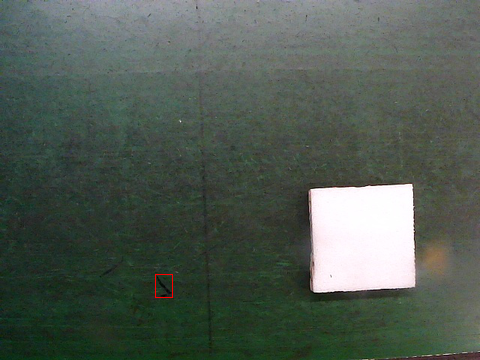

In [43]:
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['bird']))

In [44]:
modelname='ssdlite_mobilenet_v2_coco_2018_05_09'
modelname='ssd_mobilenet_v2_coco_2018_03_29'
modelname='ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='ssd_mobilenet_v1_fpn_shared_box_predictor_640x640_coco14_sync_2018_07_03'
modelname='faster_rcnn_inception_v2_coco_2018_01_28'
modelname='faster_rcnn_resnet50_coco_2018_01_28'
modelname='faster_rcnn_resnet50_lowproposals_coco_2018_01_28'
modelname='rfcn_resnet101_coco_2018_01_28'
modelname='faster_rcnn_resnet101_coco_2018_01_28'
modelname='faster_rcnn_resnet101_lowproposals_coco_2018_01_28'
modelname='faster_rcnn_inception_resnet_v2_atrous_coco_2018_01_28'
modelname='faster_rcnn_inception_resnet_v2_atrous_lowproposals_coco_2018_01_28'
PATH_TO_CKPT='/Users/aadebuger/GEXT/model/'+modelname+'/frozen_inference_graph.pb'
client = ObjectDetector()

1.0
scres[i 0.44030672
{16: <PIL.Image.Image image mode=RGB size=480x360 at 0x177D76B70>}
bird
1



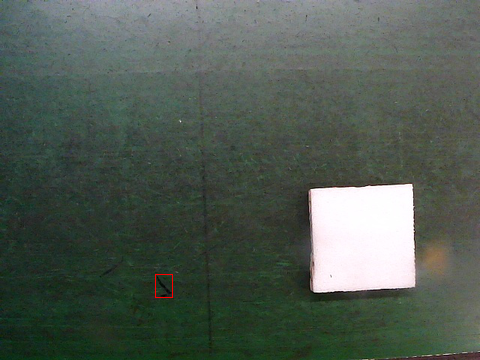

In [45]:
result=detect_objects('/Users/aadebuger/GEXT/aixgf/tzimagedata/dqn/object20190505121605.jpg')
print(len(result))
HTML("<img src='{0}'/>".format(result['bird']))